In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.split import split
from gluonts.torch import DeepAREstimator

# Load data from a CSV file into a PandasDataset
df = pd.read_csv(
    "https://raw.githubusercontent.com/AileenNielsen/"
    "TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv",
    index_col=0,
    parse_dates=True,
)
dataset = PandasDataset(df, target="#Passengers")

In [8]:
training_data, test_gen = split(dataset, offset=-36)
test_data = test_gen.generate_instances(prediction_length=12, windows=3)

In [9]:
# Train the model and make predictions
model = DeepAREstimator(
    prediction_length=12, freq="M", trainer_kwargs={"max_epochs": 5}
).train(training_data)

forecasts = list(model.predict(test_data.input))

forecasts

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/kaka/opt/anaconda3/lib/python3.9/site-packages/lightning/pytorch/trainer/configuration_validator.py:74: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
Missing logger folder: /Users/kaka/Documents/初米/lightning_logs
2023-12-18 17:10:33.335199: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.

  | Name  | Type        | Params | In sizes                                                   | Out sizes   
------------------------------------------------------------------------------------------------------------------
0 | model | DeepARModel | 23.3 K | [[1, 1], [1, 1], [1, 48, 2

Training: |                                               | 0/? [00:00<?, ?it/s]

Epoch 0, global step 50: 'train_loss' reached 5.91289 (best 5.91289), saving model to '/Users/kaka/Documents/初米/lightning_logs/version_0/checkpoints/epoch=0-step=50.ckpt' as top 1
Epoch 1, global step 100: 'train_loss' reached 4.79252 (best 4.79252), saving model to '/Users/kaka/Documents/初米/lightning_logs/version_0/checkpoints/epoch=1-step=100.ckpt' as top 1
Epoch 2, global step 150: 'train_loss' reached 4.49681 (best 4.49681), saving model to '/Users/kaka/Documents/初米/lightning_logs/version_0/checkpoints/epoch=2-step=150.ckpt' as top 1
Epoch 3, global step 200: 'train_loss' reached 4.35503 (best 4.35503), saving model to '/Users/kaka/Documents/初米/lightning_logs/version_0/checkpoints/epoch=3-step=200.ckpt' as top 1
Epoch 4, global step 250: 'train_loss' reached 4.25186 (best 4.25186), saving model to '/Users/kaka/Documents/初米/lightning_logs/version_0/checkpoints/epoch=4-step=250.ckpt' as top 1
`Trainer.fit` stopped: `max_epochs=5` reached.


[gluonts.model.forecast.SampleForecast(info=None, item_id=None, samples=array([[359.3376 , 302.36316, 408.66376, ..., 418.25336, 358.52042,
         371.4857 ],
        [350.43774, 282.36725, 353.1695 , ..., 425.00848, 371.29794,
         395.36682],
        [305.2963 , 402.03287, 352.00177, ..., 375.68356, 402.40393,
         344.9726 ],
        ...,
        [351.77182, 383.43658, 393.99002, ..., 406.14218, 352.46234,
         297.48373],
        [333.65875, 348.32108, 406.18976, ..., 433.07336, 415.82367,
         358.53763],
        [357.69495, 348.34964, 352.1567 , ..., 421.46082, 369.40726,
         375.4878 ]], dtype=float32), start_date=Period('1958-01', 'M')),
 gluonts.model.forecast.SampleForecast(info=None, item_id=None, samples=array([[357.97488, 322.72586, 375.20676, ..., 390.32016, 332.02   ,
         354.70956],
        [421.69174, 342.23724, 396.96268, ..., 387.07477, 417.21423,
         382.35388],
        [417.51144, 434.93484, 399.00952, ..., 406.14032, 386.7696 ,
   

In [22]:
forecasts[1]

gluonts.model.forecast.SampleForecast(info=None, item_id=None, samples=array([[357.97488, 322.72586, 375.20676, ..., 390.32016, 332.02   ,
        354.70956],
       [421.69174, 342.23724, 396.96268, ..., 387.07477, 417.21423,
        382.35388],
       [417.51144, 434.93484, 399.00952, ..., 406.14032, 386.7696 ,
        324.18564],
       ...,
       [343.917  , 364.97412, 374.13983, ..., 409.9617 , 408.4973 ,
        351.95972],
       [361.71515, 409.70282, 406.49814, ..., 481.83368, 393.92194,
        399.90286],
       [270.4314 , 442.43347, 397.85825, ..., 429.7449 , 372.88754,
        359.78937]], dtype=float32), start_date=Period('1959-01', 'M'))

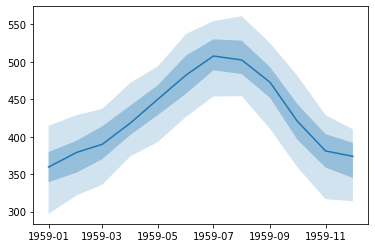

In [23]:
forecasts[1].plot()

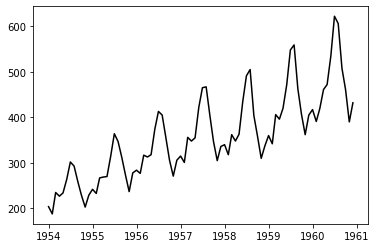

In [24]:
plt.plot(df["1954":], color="black")

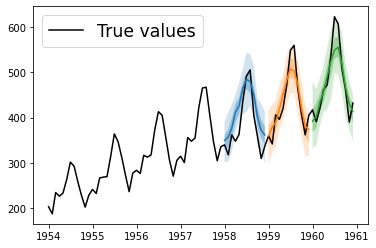

In [25]:
# Plot predictions
plt.plot(df["1954":], color="black")
for forecast in forecasts:
    forecast.plot()
plt.legend(["True values"], loc="upper left", fontsize="xx-large")
plt.show()

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_46211/2068689635.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df=filled_df.append(sku_group, ignore_index=True)


In [39]:
data

,零件号,仓库代码,需求流,日期,demods
0,XXXX,XXX,2,2023-12-01,1
1,XXXX,XXX,2,2023-12-04,2


In [42]:
import pandas as pd
from datetime import datetime
date_range = pd.date_range(start='2023-10-01', end=datetime.now(), freq='D')
date_range
data = pd.read_excel("paexcel.xlsx")
data['demods'] = pd.DataFrame(['1','2'])
filled_df = pd.DataFrame()
for sku, group in data.groupby(['零件号', '仓库代码', '需求流']):
    sku_group = group.set_index('日期')
    sku_group = group.set_index('日期').reindex(date_range, fill_value=0).reset_index()
    sku_group['零件号'] = sku[0]
    sku_group['仓库代码'] = sku[1]
    sku_group['需求流'] = sku[2]
    filled_df=filled_df.append(sku_group, ignore_index=True)

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_46211/890011544.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df=filled_df.append(sku_group, ignore_index=True)


In [43]:
filled_df

,index,零件号,仓库代码,需求流,demods
0,2023-10-01,XXXX,XXX,2,0
1,2023-10-02,XXXX,XXX,2,0
2,2023-10-03,XXXX,XXX,2,0
3,2023-10-04,XXXX,XXX,2,0
4,2023-10-05,XXXX,XXX,2,0
...,...,...,...,...,...
75,2023-12-15,XXXX,XXX,2,0
76,2023-12-16,XXXX,XXX,2,0
77,2023-12-17,XXXX,XXX,2,0
78,2023-12-18,XXXX,XXX,2,0


In [44]:
data

,零件号,仓库代码,需求流,日期,demods
0,XXXX,XXX,2,2023-12-01,1
1,XXXX,XXX,2,2023-12-04,2
